<a href="https://colab.research.google.com/github/erikasrn/Machine_Learning/blob/main/Jakarta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [123]:
!pip install pandas matplotlib seaborn scikit-learn hdbscan

In [124]:
from sklearn.cluster import DBSCAN
from sklearn.metrics.pairwise import haversine_distances
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
import hdbscan
from datetime import datetime, timedelta
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
import random

In [125]:
df = pd.read_csv('/content/TempatWisataJakarta.csv')
df.head()

,keyword,Title,Reviews,Review_points,Address,Country,City,State,Website,Phone,...,Open_Time_Friday,Open_Time_Saturday,Open_Time_Sunday,Popular_times_Monday,Popular_times_Tuesday,Popular_times_Wednesday,Popular_times_Thursday,Popular_times_Friday,Popular_times_Saturday,Popular_times_Sunday
0,Tempat wisata di Jakarta,Taman Mini Indonesia Indah,164443,4.6,"Jl. Taman Mini Indonesia Indah, Ceger, Kec. Ci...",ID,East Jakarta City,Jakarta,https://tamanmini.com/taman_jelajah_indonesia/,+62 804 178 9789,...,Friday 5 AM–8 PM 2024-11-29,Saturday 5 AM–8 PM 2024-11-30,Sunday 5 AM–8 PM 2024-12-01,0% busy at 4 AM;11% busy at 5 AM;13% busy at 6...,0% busy at 4 AM;13% busy at 5 AM;17% busy at 6...,0% busy at 4 AM;13% busy at 5 AM;16% busy at 6...,0% busy at 4 AM;13% busy at 5 AM;17% busy at 6...,0% busy at 4 AM;12% busy at 5 AM;14% busy at 6...,0% busy at 4 AM;19% busy at 5 AM;26% busy at 6...,0% busy at 4 AM;24% busy at 5 AM;32% busy at 6...
1,Tempat wisata di Jakarta,Wisata Kota Tua Jakarta,22417,4.6,"Kawasan Kota Tua, Taman Fatahillah No.1 7, RT....",ID,West Jakarta City,Jakarta,http://fb.com/wisatakotatua,NaN,...,Friday 8 AM–9 PM 2024-11-29,Saturday 8 AM–9 PM 2024-11-30,Sunday 8 AM–9 PM 2024-12-01,0% busy at 6 AM;0% busy at 7 AM;4% busy at 8 A...,0% busy at 6 AM;0% busy at 7 AM;3% busy at 8 A...,0% busy at 6 AM;0% busy at 7 AM;5% busy at 8 A...,0% busy at 6 AM;0% busy at 7 AM;4% busy at 8 A...,0% busy at 6 AM;0% busy at 7 AM;5% busy at 8 A...,0% busy at 6 AM;0% busy at 7 AM;8% busy at 8 A...,0% busy at 6 AM;0% busy at 7 AM;16% busy at 8 ...
2,Tempat wisata di Jakarta,Taman Impian Jaya Ancol,44394,4.5,"Jl. Lodan Timur No.7, RT.14/RW.10, Ancol, Kec....",ID,North Jakarta City,Jakarta,https://www.ancol.com/home,NaN,...,Friday 6 AM–10 PM 2024-11-29,Saturday 6 AM–10 PM 2024-11-30,Sunday 6 AM–10 PM 2024-12-01,0% busy at 5 AM;7% busy at 6 AM;11% busy at 7 ...,0% busy at 5 AM;6% busy at 6 AM;9% busy at 7 A...,0% busy at 5 AM;6% busy at 6 AM;9% busy at 7 A...,0% busy at 5 AM;6% busy at 6 AM;9% busy at 7 A...,0% busy at 5 AM;8% busy at 6 AM;12% busy at 7 ...,0% busy at 5 AM;18% busy at 6 AM;30% busy at 7...,0% busy at 5 AM;31% busy at 6 AM;42% busy at 7...
3,Tempat wisata di Jakarta,Taman Wisata Alam Angke,15949,4.3,"Jl. Garden House, Kamal Muara, Kec. Penjaringa...",ID,North Jakarta City,Jakarta,http://www.jakartamangrove.id/,+62 811-1787-890,...,NaN,NaN,NaN,0% busy at 4 AM;0% busy at 5 AM;0% busy at 6 A...,0% busy at 4 AM;0% busy at 5 AM;0% busy at 6 A...,0% busy at 4 AM;0% busy at 5 AM;0% busy at 6 A...,0% busy at 4 AM;0% busy at 5 AM;0% busy at 6 A...,0% busy at 4 AM;0% busy at 5 AM;0% busy at 6 A...,0% busy at 4 AM;0% busy at 5 AM;0% busy at 6 A...,0% busy at 4 AM;0% busy at 5 AM;0% busy at 6 A...
4,Tempat wisata di Jakarta,Suropati Park,21429,4.6,"Jl. Taman Suropati No.5, RT.5/RW.5, Menteng, K...",ID,Central Jakarta City,Jakarta,NaN,NaN,...,Friday 6:30 AM–5 PM 2024-11-29,Saturday 6:30 AM–5 PM 2024-11-30,Sunday 6:30 AM–5 PM 2024-12-01,0% busy at 5 AM;18% busy at 6 AM;24% busy at 7...,0% busy at 5 AM;17% busy at 6 AM;24% busy at 7...,0% busy at 5 AM;20% busy at 6 AM;27% busy at 7...,0% busy at 5 AM;17% busy at 6 AM;22% busy at 7...,0% busy at 5 AM;19% busy at 6 AM;27% busy at 7...,0% busy at 5 AM;29% busy at 6 AM;44% busy at 7...,0% busy at 5 AM;47% busy at 6 AM;79% busy at 7...


In [126]:
#Mengambil Variabel Yang akan Digunakan
df_jakarta= df.dropna(subset=['Reviews', 'City', 'Latitude', 'Longitude'])
df_jakarta = df[df['State'] == "Bali"]

df_jakarta = df[['Title', 'Reviews', 'Review_points', 'Latitude', 'Longitude']]

df_jakarta.head()

,Title,Reviews,Review_points,Latitude,Longitude
0,Taman Mini Indonesia Indah,164443,4.6,-6.302039,106.889892
1,Wisata Kota Tua Jakarta,22417,4.6,-6.135069,106.813680
2,Taman Impian Jaya Ancol,44394,4.5,-6.125275,106.833557
3,Taman Wisata Alam Angke,15949,4.3,-6.106490,106.736889
4,Suropati Park,21429,4.6,-6.199387,106.832633


In [127]:
df_jakarta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Title          127 non-null    object 
 1   Reviews        127 non-null    int64  
 2   Review_points  127 non-null    float64
 3   Latitude       127 non-null    float64
 4   Longitude      127 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 5.1+ KB


In [128]:
df_jakarta.isnull().sum()

,0
Title,0
Reviews,0
Review_points,0
Latitude,0
Longitude,0


In [129]:
df_jakarta.duplicated().sum()

0

# Train The Model

In [130]:
coords = df[['Latitude', 'Longitude']].values
scaler = StandardScaler()
coords_scaled = scaler.fit_transform(coords)

In [212]:
coords_rad = np.radians(coords)

clusterer = hdbscan.HDBSCAN(min_cluster_size=3, min_samples=1, cluster_selection_epsilon=0.0001)
cluster_labels = clusterer.fit_predict(coords_rad)

df['Cluster'] = cluster_labels

In [213]:
n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
n_noise = (cluster_labels == -1).sum()

print(f"Number of clusters: {n_clusters}")
print(f"Number of noise points: {n_noise}")

# Points per cluster
print(df['Cluster'].value_counts())

Number of clusters: 17
Number of noise points: 24
Cluster
-1     24
 7     11
 8     10
 15     8
 9      8
 0      8
 10     7
 5      7
 13     7
 14     6
 6      6
 16     5
 11     5
 4      3
 2      3
 1      3
 12     3
 3      3
Name: count, dtype: int64


In [214]:
# Assign noise points to individual clusters
noise_indices = df[df['Cluster'] == -1].index
new_cluster_labels = list(range(n_clusters, n_clusters + n_noise))
df.loc[noise_indices, 'Cluster'] = new_cluster_labels


n_clusters_new = len(set(df['Cluster']))
n_noise_new = (df['Cluster'] == -1).sum()

print(f"New Number of clusters: {n_clusters_new}")
print(f"New Number of noise points: {n_noise_new}")

# Points per cluster
print(df['Cluster'].value_counts())

New Number of clusters: 41
New Number of noise points: 0
Cluster
7     11
8     10
0      8
15     8
9      8
5      7
13     7
10     7
14     6
6      6
16     5
11     5
3      3
12     3
1      3
4      3
2      3
29     1
39     1
38     1
37     1
36     1
35     1
34     1
33     1
32     1
31     1
30     1
28     1
19     1
17     1
27     1
26     1
25     1
24     1
23     1
18     1
22     1
21     1
20     1
40     1
Name: count, dtype: int64


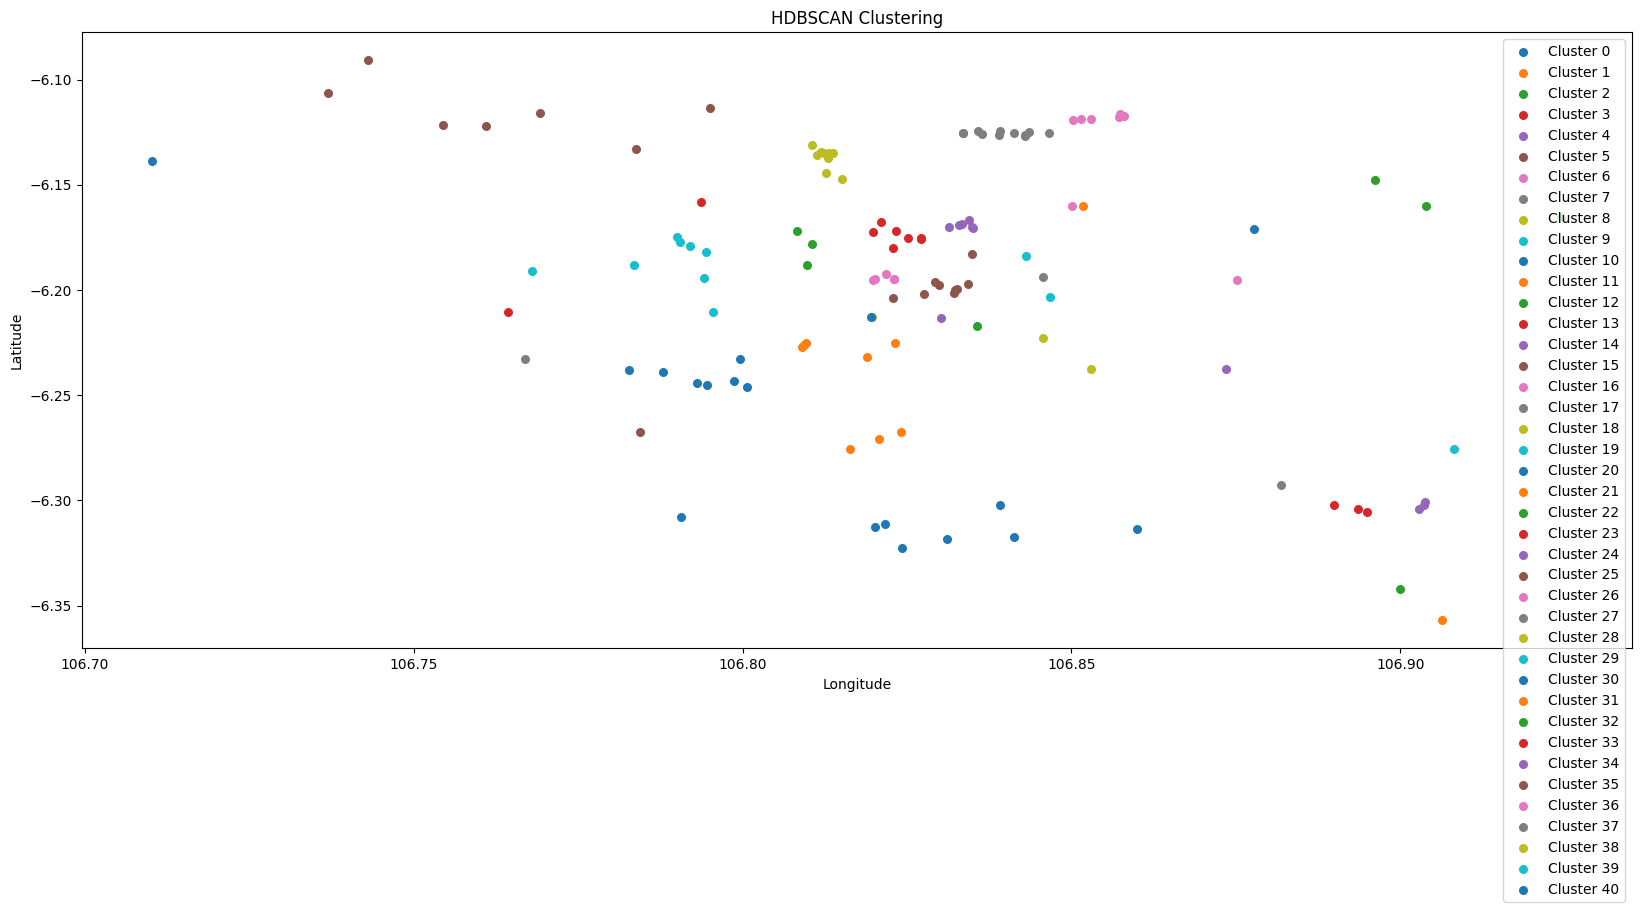

In [217]:
plt.figure(figsize=(20, 8))
for cluster_id in sorted(df['Cluster'].unique()):
    label = f"Cluster {cluster_id}" if cluster_id != -1 else "Noise"
    cluster_points = df[df['Cluster'] == cluster_id]
    plt.scatter(cluster_points['Longitude'], cluster_points['Latitude'], label=label, s=30)

plt.title("HDBSCAN Clustering")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.show()

In [215]:
clusters = {}
for cluster_id in sorted(df['Cluster'].unique()):
    if cluster_id == -1:
        continue
    clusters[f"Cluster {cluster_id + 1}"] = df[df['Cluster'] == cluster_id][['Title', 'Latitude', 'Longitude']]

for day, locations in clusters.items():
    print(f"\n{day} ({len(locations)} locations):")
    print(locations)


Cluster 1 (8 locations):
                              Title  Latitude   Longitude
33                  Taman Jagakarsa -6.317406  106.841263
46   Museum Layang-layang Indonesia -6.307985  106.790585
49                     Tanjung Park -6.302435  106.839170
51       Apotik Mutiara Dwi Tunggal -6.322613  106.824187
61            Taman Anggrek Ragunan -6.311211  106.821702
66                Taman Dadap Merah -6.318281  106.831155
71         Schmutzer Primate Center -6.312456  106.820187
102           Cijantung Forest City -6.313489  106.859980

Cluster 2 (3 locations):
                      Title  Latitude   Longitude
40   Museum di Tengah Kebun -6.267513  106.824107
50    The Playground Kemang -6.270935  106.820763
124        Mural photo spot -6.275457  106.816261

Cluster 3 (3 locations):
                                   Title  Latitude   Longitude
14  Bounce Street Asia - Trampoline Park -6.147762  106.896237
62          Jogging Park 1 Kelapa Gading -6.160024  106.903880
92         

In [216]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Calculate evaluation metrics
silhouette_avg = silhouette_score(coords_rad, df['Cluster'])
davies_bouldin = davies_bouldin_score(coords_rad, df['Cluster'])
calinski_harabasz = calinski_harabasz_score(coords_rad, df['Cluster'])


# Create a DataFrame for the evaluation matrix
evaluation_matrix = pd.DataFrame({
    'Metric': ['Silhouette Score', 'Davies-Bouldin Index', 'Calinski-Harabasz Index'],
    'Score': [silhouette_avg, davies_bouldin, calinski_harabasz]
})

evaluation_matrix

# Interpretasi hasil
# Silhouette Score:  Semakin mendekati 1, semakin baik clustering. Nilai negatif menunjukkan kemungkinan salah clustering.
# Davies-Bouldin Index:  Semakin rendah nilainya, semakin baik clustering.
# Calinski-Harabasz Index:  Semakin tinggi nilainya, semakin baik clustering.

,Metric,Score
0,Silhouette Score,0.424565
1,Davies-Bouldin Index,0.370163
2,Calinski-Harabasz Index,131.392645
